# Predicting House Prices Using Regression in Tensor Flow

In this project, I'll use house price [data](https://github.com/TahaSherif/Predicting-House-Prices-with-Regression-Tensorflow/blob/master/data.csv) to build, train, and test a neural network model for house price predictions.

Steps inolved to acheive this goal are:
1. Loading environment 
2. Loading Data
3. Data Cleaning
4. Data Normalization
5. Building Neural Network Model
6. Compiling Model
7. Training Model
8. Validating Model
9. Visual Representation of Model's Performance

## Loading Environment

In [1]:
from platform import python_version
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
%matplotlib inline
print("Python Version:", python_version())
print("Tensor Flow Version:", tf.__version__)
print("Pandas Version:", pd.__version__)
print("Numpy  Version:", np.__version__)
print("Scikit-learn Version:", sklearn.__version__)


Python Version: 3.7.12
Tensor Flow Version: 2.7.0
Pandas Version: 1.1.5
Numpy  Version: 1.19.5
Scikit-learn Version: 1.0.1


## Loading, Cleaning, and Normalizing the Data

The [dataset](https://github.com/TahaSherif/Predicting-House-Prices-with-Regression-Tensorflow/blob/master/data.csv) used in this project contains 7 feature columns:
- serial
- date
- age (years bw construction and date of data collection)
- distance (from nearby urban center)
- stores
- latitude
- longitude


In [2]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']
data= pd.read_csv('data.csv',names=column_names)
data.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [3]:
data.describe()

,serial,date,age,distance,stores,latitude,longitude,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2499.500000,2008.912800,18.945000,4.977800,4.915000,84.97140,124.994200,13906.638600
std,1443.520003,5.457578,11.329539,3.199837,3.142889,3.16199,3.167992,1020.774876
min,0.000000,2000.000000,0.000000,0.000000,0.000000,80.00000,120.000000,11263.000000
25%,1249.750000,2004.000000,9.000000,2.000000,2.000000,82.00000,122.000000,13197.750000
50%,2499.500000,2009.000000,19.000000,5.000000,5.000000,85.00000,125.000000,13893.500000
75%,3749.250000,2014.000000,29.000000,8.000000,8.000000,88.00000,128.000000,14614.000000
max,4999.000000,2018.000000,38.000000,10.000000,10.000000,90.00000,130.000000,16964.000000


In [4]:
# Let's check if the dataset has any missing values
data.isnull().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

In [5]:
# Let's drop the label and any useless column to define our feature space|
features= data.drop(["price","serial"],axis=1)
features.head()

,date,age,distance,stores,latitude,longitude
0,2009,21,9,6,84,121
1,2007,4,2,3,86,121
2,2016,18,3,7,90,120
3,2002,13,2,2,80,128
4,2014,25,5,8,81,122


Let's normalize our feature space. This helps us reduce the number of iterations our optimizer function needs to minimize the defined loss function.


In [6]:
# Let's normalize our feature space. This helps reducing the number of iterations our optimizer function needs to minimize the loss
normalized_features=(features-features.mean())/features.std()
normalized_features.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [7]:
x=normalized_features
y= data["price"]

In [8]:
# Let's convert our feature space (df )and label vector (series)to n-dimensional arrays
x_arr=x.values
y_arr=y.values
print('features array :',x_arr)
print('label array : ',y_arr)

features array : [[ 0.01597778  0.18138426  1.25700164  0.34522379 -0.30721158 -1.26079862]
 [-0.35048517 -1.31911814 -0.93060999 -0.60931203  0.32530146 -1.26079862]
 [ 1.29859812 -0.08341028 -0.61809404  0.66340239  1.59032754 -1.57645598]
 ...
 [ 1.4818296  -1.14258845  1.56951759  0.02704518  1.59032754  0.00183081]
 [ 0.19920926  1.59362182 -0.61809404  0.02704518 -1.25598114  0.94880289]
 [ 1.66506107 -0.87779391 -1.24312594  1.2997596   1.59032754  0.63314553]]
label array :  [14264 12032 13560 ... 14102 14313 12770]


## Train/Test Split

In [9]:

x_train, x_test, y_train, y_test=train_test_split(x_arr,y_arr, test_size=0.10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4500, 6)
(500, 6)
(4500,)
(500,)


## Building and Compiling Neural Network

Let's now build a neural network that has:
1. 10 neurons in 1st hidden layer activated by 'relu' function
2. 20 neurons in 2nd layer activated by 'relu' function
3. 5 neurons in 3rd layer activated by 'relu' function


In [10]:
model= Sequential([Dense(10,activation='relu',input_shape=(6,)),
                   Dense(20, activation='relu'),
                   Dense(5, activation='relu'),
                   Dense(1)])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


As can be seen from the summary table of our model:
1. There are 60 weights and 10 biases between input layer and first hidden layer
2. There are 200 weights and 20 biases between first hidden layer and second hidden layer
3. There are 100 weights and 5 biases between the second hidden layer and third hidden layer
4. There are 5 weights and 1 bias between the third layer and the output layer

![picture](https://drive.google.com/uc?id=1zwryTRiRnsqimt2l6pcxikcSjuApcK8d)

In [11]:
# Now that we have developed our model, let's compile it by defining the loss function and optimization method
model.compile(loss='mse',optimizer='adam')
# Let's now use our untrained model(initial/non-optimized weights and biases) to make predictions
untrained_predictions = model.predict(x_test)
len(untrained_predictions)

500

## Training and Testing Our Neural Network


In [12]:
#We can use an EarlyStopping callback from Keras to stop the model training if the validation loss stops decreasing for a few epochs
es_cb = EarlyStopping(monitor='val_loss', patience=5)

In [13]:
 # Let's now fit our model to training data
 history=model.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 200,
    callbacks=[es_cb]
    )
 trained_predictions= model.predict(x_test)
 len(trained_predictions)

Epoch 1/200
141/141 [==============================] - 1s 3ms/step - loss: 194543184.0000 - val_loss: 192897248.0000
Epoch 2/200
141/141 [==============================] - 0s 2ms/step - loss: 193934816.0000 - val_loss: 191465264.0000
Epoch 3/200
141/141 [==============================] - 0s 2ms/step - loss: 190201424.0000 - val_loss: 184542976.0000
Epoch 4/200
141/141 [==============================] - 0s 2ms/step - loss: 176594544.0000 - val_loss: 163383952.0000
Epoch 5/200
141/141 [==============================] - 0s 2ms/step - loss: 144931456.0000 - val_loss: 123062936.0000
Epoch 6/200
141/141 [==============================] - 0s 2ms/step - loss: 96706704.0000 - val_loss: 72036360.0000
Epoch 7/200
141/141 [==============================] - 0s 2ms/step - loss: 48405768.0000 - val_loss: 31068514.0000
Epoch 8/200
141/141 [==============================] - 0s 2ms/step - loss: 19154234.0000 - val_loss: 12320924.0000
Epoch 9/200
141/141 [==============================] - 0s 3ms/step - l

500

## Plotting Convergence of Training and Validation Loss

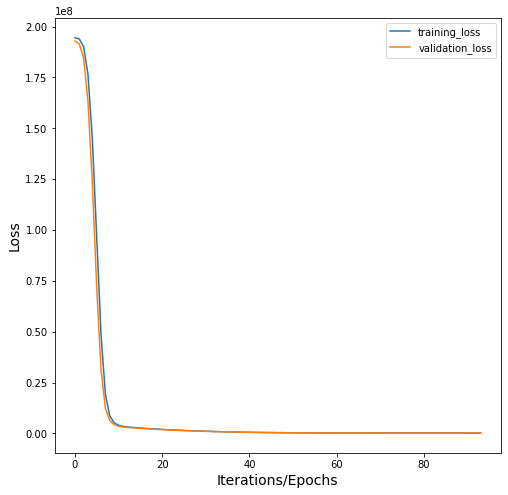

In [14]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
plt.figure(figsize=(8,8))
plt.plot(range(len(loss)),loss,label='training_loss')
plt.plot(range(len(val_loss)),val_loss,label='validation_loss')
plt.xlabel("Iterations/Epochs",size=14)
plt.ylabel("Loss",size=14)
plt.legend()
plt.show()

The above graph shows that after 10 iterations, both training and validation loss dropped significantly and then stabalized as number of epochs increased.

## Computing Model's RMSE

In [15]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test, trained_predictions)
print("Model RMSE:", "{}$".format(int(mse**(1/2))))

mean_house_price= data["price"].mean()
print("Mean house price in data:", "{}$".format(int(mean_house_price)))

Model RMSE: 422$
Mean house price in data: 13906$


With our data that has mean house price of roughly 14k dollars, predictive error of +- 400 dollars is a very good result. This means given 6 features we used to train our model, the model can predict the house price within the error range of 400 dollars. A remarkably good prediction model!

## Plotting Actual versus Predicted Lables

Let's now end this project by getting a visual feel of how the actual versus predicted house prices look like for our testing set with 500 examples.

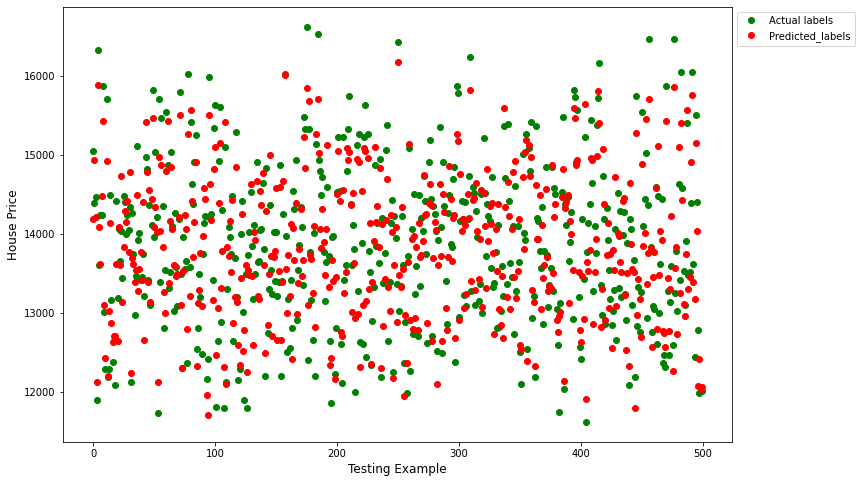

In [16]:
plt.figure(figsize=(12,8))
plt.plot([i for i in range(len(y_test))], y_test, 'go', label="Actual labels")
plt.plot([i for i in range(len(y_test))], trained_predictions, 'ro', label="Predicted_labels")
plt.xlabel("Testing Example", size=12)
plt.ylabel("House Price", size=12)
plt.legend(bbox_to_anchor=(1,1))
plt.show()